# 🏥 Healthcare Insurance Cost Analysis  
## 📊 Notebook 10 – Clustering

| Feild | Description |
|-------|-------------|
|**Author:** | Robert Steven Elliott  |
|**Course:** | Code Institute – Data Analytics with AI Bootcamp |  
|**Project Type:** | Individual Formative Project  | 
|**Date:** | December 2025  |

## Change Working Directory

In [23]:
import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))
print("✅ Working directory set to project root:", PROJECT_ROOT)

✅ Working directory set to project root: /home/robert/Projects/health-insurance-cost-analysis


## Load Libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from utils.data_handler import load_data, data_overview, clean_data

## Load Data

In [25]:
input_path = PROJECT_ROOT / "data" / "final" / "insurance_final.csv"

df = load_data(input_path)
data_overview(df)
df = clean_data(df, categorical_cols=['sex', 'smoker', 'region'])
selected_features = [
    "age", "bmi", "children", "charges",
    "sex", "smoker", "region"
]
df_selected = df[selected_features]

DataFrame Shape: (1337, 10)

Data Types:
 age                       int64
sex                      object
bmi                     float64
children                  int64
smoker                   object
region                   object
charges                 float64
bmi_category             object
age_group                object
family_size_category     object
dtype: object

Missing Values:
 age                     0
sex                     0
bmi                     0
children                0
smoker                  0
region                  0
charges                 0
bmi_category            0
age_group               0
family_size_category    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1337 non-null   int64  
 1   sex                   1337 non-null   object 
 2   bmi              

In [26]:
df_encoded = pd.get_dummies(df[selected_features], drop_first=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [27]:
inertias = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

In [28]:

kl = KneeLocator(
    K, inertias, 
    curve="convex", 
    direction="decreasing"
)

optimal_k = kl.elbow
optimal_k

np.int64(4)

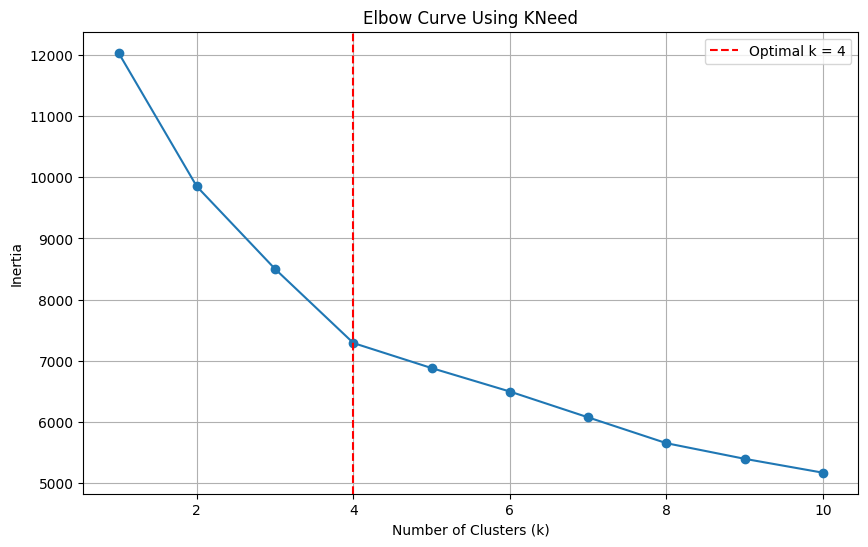

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, marker='o')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')

plt.title("Elbow Curve Using KNeed")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

In [31]:
df.groupby("cluster").mean(numeric_only=True)

,age,bmi,children,charges
cluster,,,,
0,38.697417,30.811624,1.114391,32239.065600
1,39.092453,31.449292,1.056604,8581.767343
2,39.126866,29.147985,1.126866,8634.583908
3,40.104478,30.475000,1.123134,8041.020414


In [32]:
df.groupby("cluster")["smoker"].value_counts(normalize=True)

cluster  smoker
0        yes       1.000000
         no        0.000000
1        no        1.000000
         yes       0.000000
2        no        0.992537
         yes       0.007463
3        no        0.996269
         yes       0.003731
Name: proportion, dtype: float64

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

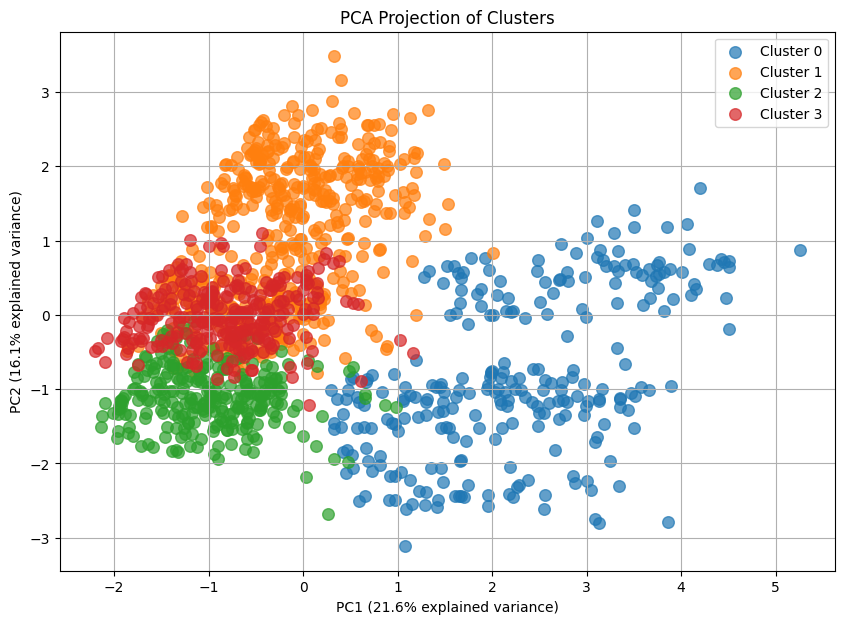

In [34]:
plt.figure(figsize=(10,7))

for cluster in np.unique(clusters):
    plt.scatter(
        X_pca[clusters == cluster, 0],
        X_pca[clusters == cluster, 1],
        s=70,
        alpha=0.7,
        label=f"Cluster {cluster}"
    )

plt.xlabel("PC1 ({:.1f}% explained variance)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 ({:.1f}% explained variance)".format(pca.explained_variance_ratio_[1]*100))
plt.title("PCA Projection of Clusters")
plt.legend()
plt.grid(True)
plt.show()